## Part II: Practical applications

### 2.1 K-means clustering 

In Python you can use the function KMeans() from the module sklearn.cluster to perform K-means clustering. To begin you will perform K-means with simulated data. Follow the steps:

(a) The simulated data will consist  in 50 observations described by two normal-distributed variables. In order to define classes in the data the first 25 observations have a mean shift relative to the next 25 observations.

In [21]:
import numpy   as   np
X  =  np.random.randn(50,2)
X[0:25, 0]  =  X[0:25, 0] + 3
X[0:25, 1]  =  X[0:25, 1] - 4

You can plot the observations and notice that there are two well separated clusters :

Text(0, 0.5, 'X2')

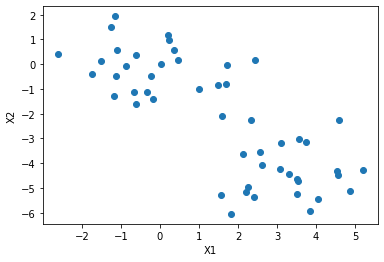

In [22]:
import matplotlib.pyplot as plt 
plt.plot(X[:, 0], X[:,1], "o")
plt.xlabel("X1")
plt.ylabel("X2")  

(b) Performs K-means clustering with K=2. Use the following command:

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 100).fit(X)

Then, the cluster assignments can be obtained by running print(kmeans.labels_). The final clusters centroids can be known using the command print(kmeans.cluster_centers_). 
In addition, you can plot the observations using a different color per cluster by running the following code:

Text(0, 0.5, 'X2')

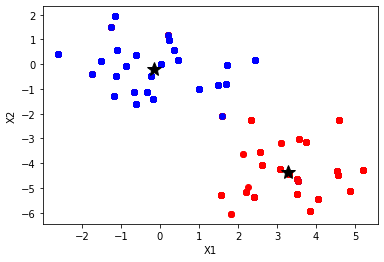

In [24]:
for i in range(0, X.shape[0]):
    if kmeans.labels_[i]==0:
        plt.plot(X[i:, 0], X[i:, 1], "o", color = "red")
    else:
        plt.plot(X[i:,0], X[i:,1], "o", color = "blue")
centroid1=kmeans.cluster_centers_[0]
centroid2=kmeans.cluster_centers_[1]
plt.plot(centroid1[0], centroid1[1], "*", color = "black", markersize = 15)
plt.plot(centroid2[0], centroid2[1], "*", color = "black", markersize = 15)
plt.xlabel("X1")
plt.ylabel("X2")

(c)Now, you are going to perform K−means with real data. The fileHCVdata.csv contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. There are 12 variables, features 4-12 concern laboratory data (ALB, ALT, AST, BIL,CHE, CHOL, CREA, GGT and PROT ). 
Import the data set and get familiar with the data.
Answer the following questions :
 1. How many observations are there ? There are 567 observations.
 2. How many variables are there ?  There are 13 variables.
 3. What  type  of  variables  (numeric,  categorical) ?  For  each  categorical  variable  (if  any)give the number of levels and categories. You will denote the resulting dataframe objectdfHVC.

Let's read the data from the csv file and see the variables' data types.

In [25]:
import pandas as pd
dfHVC = pd.read_csv('HCVdata.csv', sep=';')
dfHVC.columns.tolist()

['Unnamed: 0',
 'Category',
 'Sex',
 'Age',
 'ALB',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [26]:
dfHVC.head(20)


,Unnamed: 0,Category,Sex,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,m,32,38.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,m,32,38.5,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,m,32,46.9,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,m,32,43.2,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,m,32,39.2,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,7,0=Blood Donor,m,32,46.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
6,8,0=Blood Donor,m,32,42.2,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
7,9,0=Blood Donor,m,32,50.9,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
8,10,0=Blood Donor,m,32,42.4,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9
9,11,0=Blood Donor,m,32,44.3,21.7,22.4,17.2,4.15,3.57,78.0,24.1,75.4


In [27]:
dfHVC.tail(20)

,Unnamed: 0,Category,Sex,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
547,595,3=Cirrhosis,m,51,33.0,4.5,66.6,91.0,4.02,4.08,75.9,28.5,62.3
548,596,3=Cirrhosis,m,56,27.0,17.0,319.8,37.0,1.42,3.54,66.9,93.7,65.3
549,597,3=Cirrhosis,m,56,23.0,5.1,123.0,43.0,1.80,2.40,62.7,35.9,62.8
550,598,3=Cirrhosis,m,56,30.0,0.9,80.3,119.0,1.88,1.43,79.3,17.6,54.2
551,599,3=Cirrhosis,m,58,31.0,7.0,181.8,58.0,3.29,3.92,66.4,273.7,78.1
552,600,3=Cirrhosis,m,59,36.0,5.2,110.1,37.0,2.29,3.68,118.2,56.9,74.8
553,601,3=Cirrhosis,m,59,27.0,4.0,65.2,209.0,2.47,3.61,71.7,28.5,60.6
554,602,3=Cirrhosis,m,59,31.0,5.4,95.4,117.0,1.57,3.51,60.5,53.6,68.5
555,603,3=Cirrhosis,m,61,39.0,27.3,143.2,15.0,5.38,4.88,72.3,400.3,73.4
556,605,3=Cirrhosis,m,74,23.0,2.1,90.4,22.0,2.50,3.29,51.0,46.8,57.1


In [28]:
dfHVC.dtypes

Unnamed: 0      int64
Category       object
Sex            object
Age             int64
ALB           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [29]:
dfHVC['Sex'] = dfHVC['Sex'].astype('category');
dfHVC['Category'] = dfHVC['Category'].astype('category');
dfHVC.dtypes

Unnamed: 0       int64
Category      category
Sex           category
Age              int64
ALB            float64
ALT            float64
AST            float64
BIL            float64
CHE            float64
CHOL           float64
CREA           float64
GGT            float64
PROT           float64
dtype: object

The Category variable can be simplifies, so that there can be only numbers. For '0=Blood Donors' the value would be '0', for '1=Hepatitis' the value would be '1', and for '2=Fibrosis' would be '2', then for the '3=Cirrhosis' the value would be '3'.

In [30]:
dfHVC["Category"].replace({"0=Blood Donor": "0", 
                           "1=Hepatitis": "1", 
                           "2=Fibrosis": "2", 
                           "3=Cirrhosis":"3"}, 
                           inplace=True)

dfHVC.tail(30)

,Unnamed: 0,Category,Sex,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
537,583,2,f,51,37.0,164.0,70.0,9.0,3.99,4.20,67.0,43.0,72.0
538,584,2,f,56,39.0,42.0,34.0,10.0,7.75,5.00,80.0,84.0,78.0
539,586,3,m,38,44.0,94.0,60.0,12.0,4.37,3.20,61.0,99.0,77.0
540,587,3,m,39,34.0,4.8,35.6,9.0,3.65,4.82,519.0,133.4,57.5
541,588,3,m,41,31.0,4.8,60.2,200.0,1.80,5.34,106.4,151.0,71.8
542,589,3,m,42,36.0,14.9,263.1,40.0,3.61,3.93,49.6,61.0,68.6
543,590,3,m,45,29.0,7.1,101.9,31.0,1.73,3.71,76.7,65.6,70.0
544,592,3,m,46,35.0,2.3,19.2,11.0,7.10,4.10,1079.1,105.6,69.1
545,593,3,m,47,42.0,159.0,102.0,11.0,6.29,5.50,58.0,201.0,79.0
546,594,3,m,51,39.0,29.6,185.0,19.0,2.00,3.60,58.3,399.5,79.4


In [31]:
dfHVC =  dfHVC.drop(columns=['Unnamed: 0'])
dfHVC.head(20)

,Category,Sex,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,m,32,38.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,m,32,38.5,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,m,32,46.9,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,m,32,43.2,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,m,32,39.2,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,0,m,32,46.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
6,0,m,32,42.2,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
7,0,m,32,50.9,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
8,0,m,32,42.4,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9
9,0,m,32,44.3,21.7,22.4,17.2,4.15,3.57,78.0,24.1,75.4


Let for the 'Sex' variable 0 is female, and 1 is male.

In [32]:
dfHVC["Sex"].replace({"m": "1", 
                      "f": "0"}, 
                       inplace=True)

dfHVC.tail(40)

,Category,Sex,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
527,2,1,54,41.0,41.5,187.9,21.0,8.59,5.85,91.0,104.9,79.1
528,2,1,57,47.0,10.2,55.9,12.0,6.60,4.64,70.9,69.6,80.9
529,2,1,59,44.0,8.9,74.5,6.0,9.45,4.45,65.0,95.3,69.7
530,2,1,64,38.0,7.1,41.3,13.0,7.10,4.52,70.0,53.0,66.8
531,2,1,71,37.0,130.0,90.0,15.0,9.92,4.70,79.0,77.0,76.0
532,2,0,36,46.0,67.1,161.9,13.0,9.24,4.81,65.3,60.0,73.9
533,2,0,38,40.0,14.9,68.9,11.0,8.55,4.31,60.5,40.1,76.5
534,2,0,57,43.0,8.3,35.8,18.0,8.61,6.19,71.4,27.9,82.0
535,2,0,68,43.0,5.0,42.1,12.0,7.29,4.89,80.9,11.9,76.1
536,2,0,49,39.0,46.0,39.0,9.0,10.21,3.10,89.0,53.0,79.0


(d) Since all the clustering approaches used in this lab are based upon distancesor  dissimilarity  measures,  it  is  strongly  recommended  to  scale  the  variables  previously.  The following code allows to scale all the variables in a dataframe called dfHVC :


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfHVC_scaled = scaler.fit_transform(dfHVC)



Create a dataframe containing all the numeric variables after being scaled, you will name theresulting output dfHVC_scaled.

In [34]:
dfHVC_scaled = pd.DataFrame(dfHVC_scaled)
type(dfHVC_scaled)

pandas.core.frame.DataFrame

(e) 

In [57]:
dfHVC_Kmeans4=KMeans(n_clusters = 2, n_init = 50, random_state = 1000).fit(dfHVC_scaled)
dfHVC_Kmeans4.cluster_centers_

array([[-0.24487944, -0.01427549, -0.03516566,  0.08789789, -0.04734399,
        -0.20142963, -0.13943136,  0.11561622,  0.08670992, -0.06274669,
        -0.15746062,  0.00580842],
       [ 3.06099296,  0.17844356,  0.43957073, -1.09872364,  0.59179983,
         2.51787043,  1.74289203, -1.44520281, -1.08387394,  0.78433365,
         1.96825773, -0.07260523]])

In [60]:
pd.crosstab(index=dfHVC.Sex, columns=dfHVC_Kmeans4.labels_, rownames=['Real groups'], colnames=['K-means clusters'])

K-means clusters,0,1
Real groups,,
0,212,13
1,313,29


# 2.2

In [67]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(X, "complete")

Let's plot the associated dendogram using the previous results:

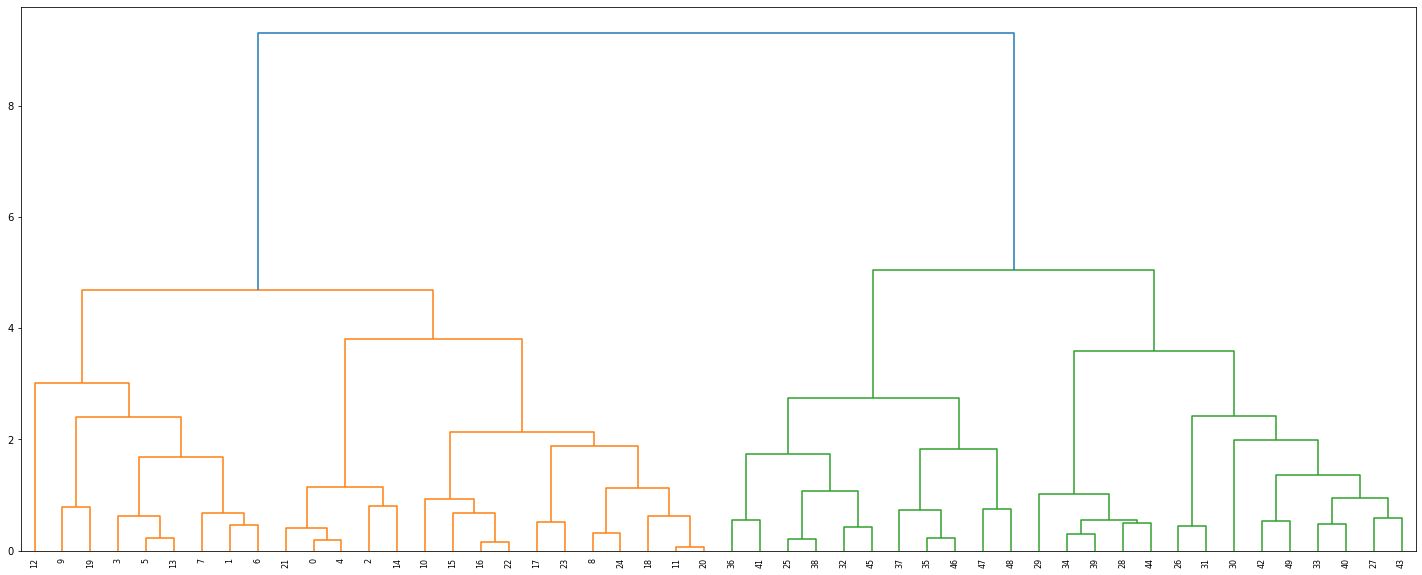

In [68]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
dendrogram(hc_complete)
plt.show()

We remark the 2 clusters are clearly identified, which is normal because we performed hierarchical
clustering with simulated data.
To determine the cluster labels for each observation associated with a given cut of the dendrogram,
you can use the cut_tree() function from the scipy.cluster.hierarchy module . For example, to
obtain two clusters you can execute the code

In [69]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters=2).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


(a) Perform hierarchical clustering using the HCVdata using complete, average and
single linkage. To begin you will cut the dendrogram at 4 clusters. Similarly to the previous
section, calculate the matching matrix and comment the results.

## Complete

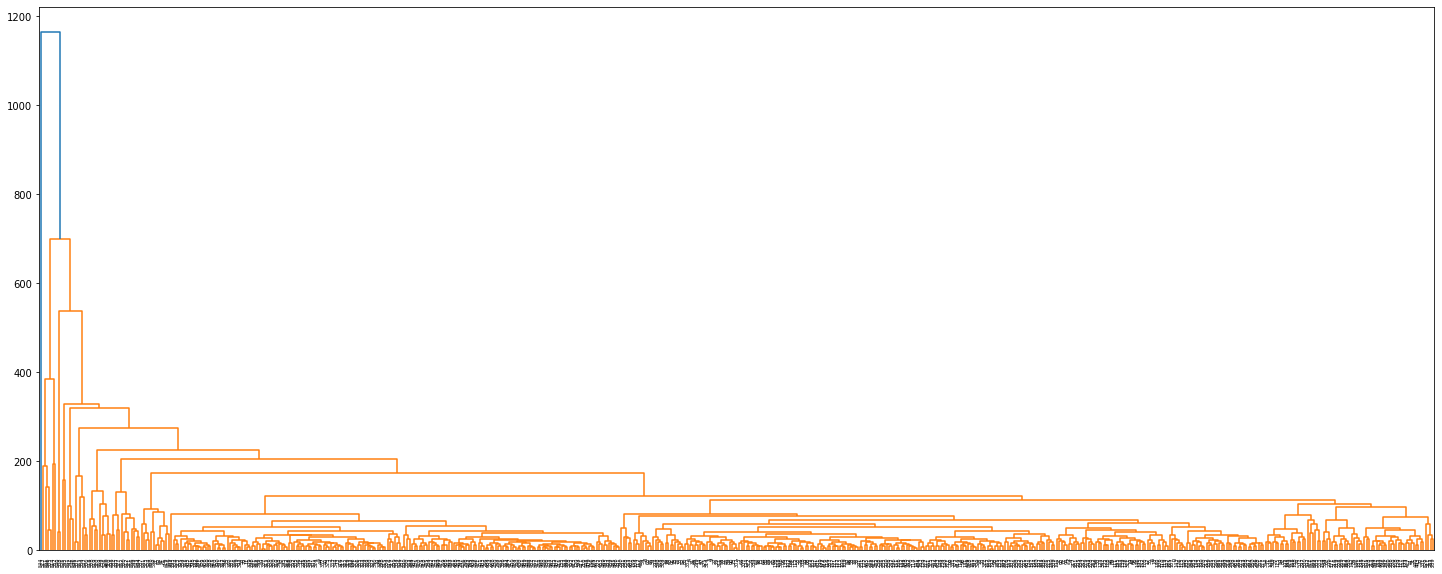

In [70]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

hc_complete = linkage(dfHVC, "complete")
plt.figure(figsize=(25, 10))
dendrogram(hc_complete)
plt.show()

In [71]:
print(cut_tree(hc_complete, n_clusters=4).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Average

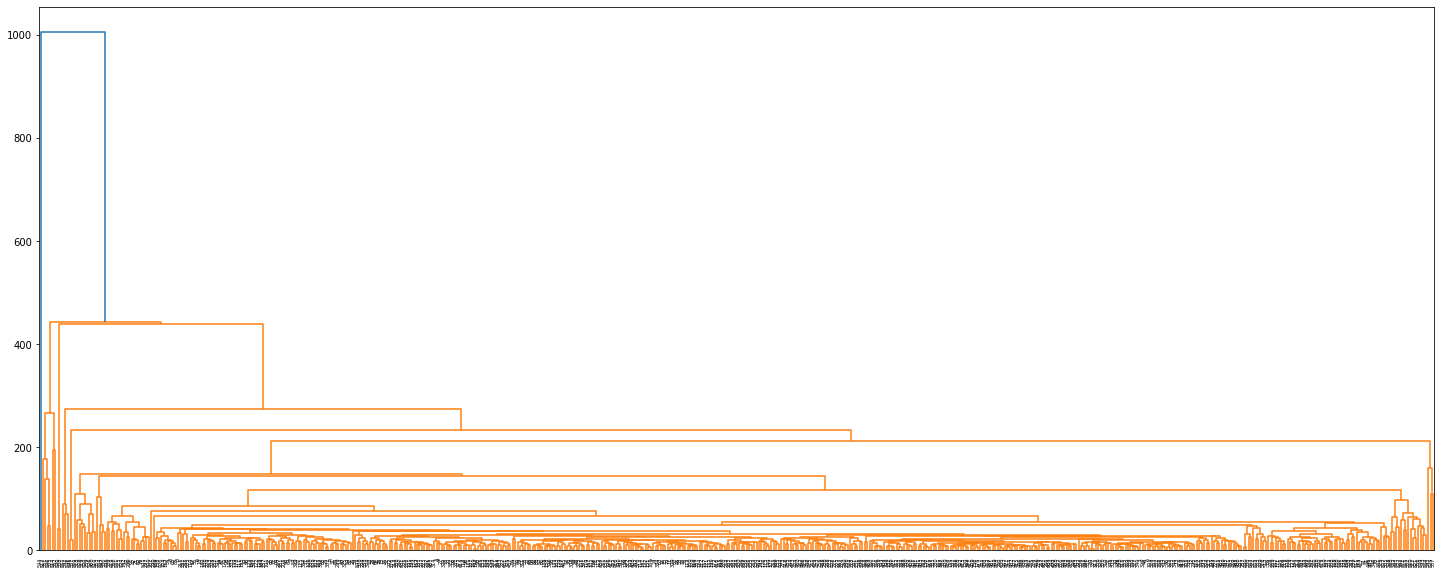

In [72]:
hc_average = linkage(dfHVC, "average")
plt.figure(figsize=(25, 10))
dendrogram(hc_average)
plt.show()

In [73]:
print(cut_tree(hc_average, n_clusters=4).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Single

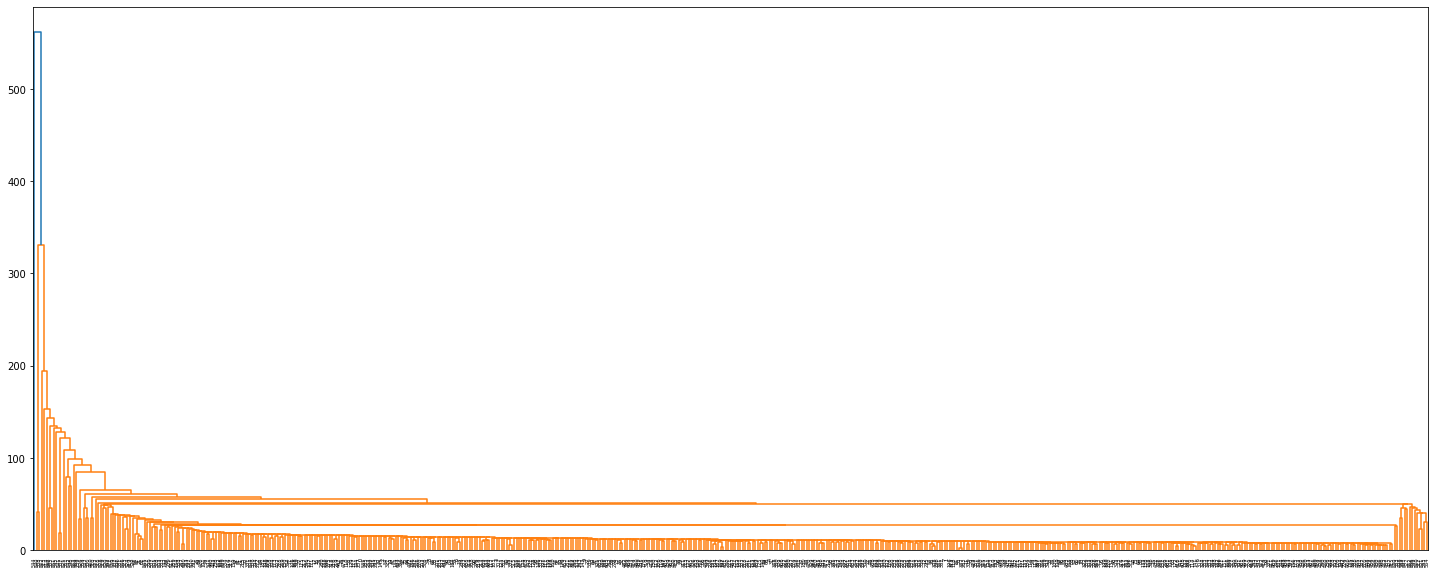

In [74]:
hc_single = linkage(dfHVC, "single")
plt.figure(figsize=(25, 10))
dendrogram(hc_single)
plt.show()

In [75]:
print(cut_tree(hc_single, n_clusters=4).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 